# Regresión Logística

In [67]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras.

Aproximadamente el 70% de los problemas en el Machine Learning son de clasificación.

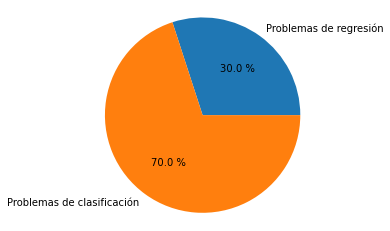

In [68]:
manzanas = [30,70]
nombres = ['Problemas de regresión', 'Problemas de clasificación']
plt.pie(manzanas, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

La regresión logística es un método de regresión útil para resolver problemas de clasificación binaria.

Es un método estadístico para predecir clases binarias.

Nos ayuda a clasificar nuestros registros en dos o más categorías:

- Predecir si un cliente aleatorio que entra en la tienda va a comprar un producto en particular basándonos en sus ingresos, género, historial de compras, historial de publicidad...
- Predecir si un equipo de futbol va a ganar o perder un partido sabiendo el rival, los detalles del equipo, el tiempo que va a hacer, la alineación, el estadio, las horas de entreno...

La función logística es una curva que puede tomar cualquier número de valor real y asignar cualquier valor entre 0 y 1.
- Si la curva va a infinito POSITIVO la predicción se convertirá en 1.
- Si la curva va a infinito NEGATIVO la predicción se convertirá en 0.

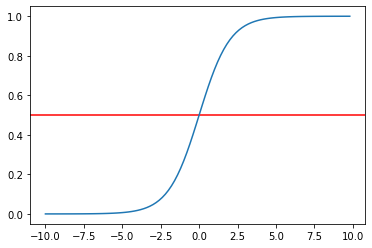

In [69]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.axhline(y=0.5, color="red")
plt.plot(x,sig)
plt.show()

- Si la salida de la función logística es mayor o igual que 0.5 podemos clasificar el resultado como 1.
- Si la salida de la función logística es menor que 0.5 podemos clasificar el resultado como 0.

Por su parte si el resultado es 0.75 podemos decir en términos de probabilidad que hay un 75% de probabilidad que la salida de la función sea 1.

### Regresión Lineal vs Regresión Logística

La primera diferencia es que la variable y ya no es continua, sino discreta.

$$y\in\{0, 1\}$$
$$P\in [0, 1]$$
$$X\in [-\infty, \infty]$$

| Regresión lineal (salida continua)              | Regresión logística (salida discreta)        |
| ------------------------------------------------| -------------------------------------------- |
| Conocer el porcentaje de probabilidad de lluvia | Conocer si va a llover o no                  |
| Conocer el precio de una acción                 | Saber si el precio de una acción subirá o no |

## Implementación de la regresión logística en python

### Limpieza de datos

In [70]:
data = pd.read_csv('../data/bank.csv', sep = ';')

In [71]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [72]:
data.shape

(4119, 21)

In [73]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [74]:
data['y'] = (data['y'] == 'yes').astype(int)

In [75]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [76]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [77]:
data['education'] = np.where(data['education']=='basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education']=='high.school', 'High School', data['education'])
data['education'] = np.where(data['education']=='professional.course', 'Profesional Course', data['education'])
data['education'] = np.where(data['education']=='university.degree', 'University Degree', data['education'])
data['education'] = np.where(data['education']=='illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education']=='unknown', 'Unknown', data['education'])

In [78]:
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Profesional Course',
       'Unknown', 'Illiterate'], dtype=object)

### Análisis de los datos

In [79]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [80]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [81]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Profesional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


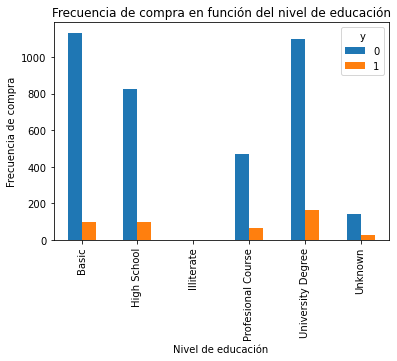

In [82]:
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia de compra')
plt.show()

Text(0, 0.5, 'Proporción de clientes')

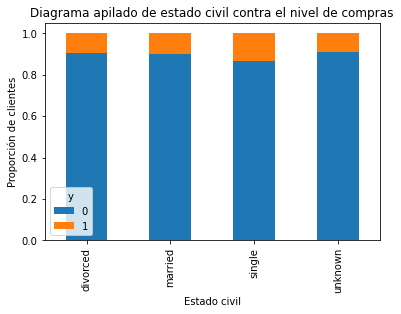

In [83]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Diagrama apilado de estado civil contra el nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

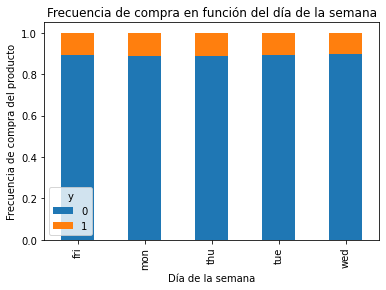

In [84]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Frecuencia de compra en función del día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de compra del producto')
plt.show()

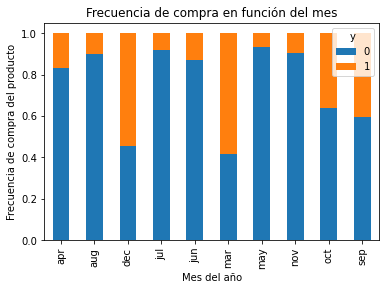

In [85]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Frecuencia de compra del producto')
plt.show()

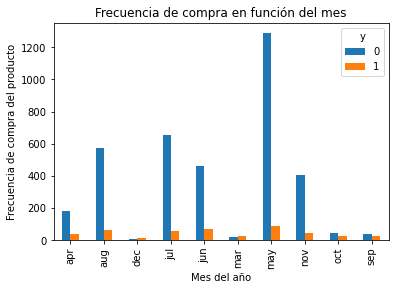

In [86]:
table = pd.crosstab(data.month, data.y).plot(kind='bar')
plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Frecuencia de compra del producto')
plt.show()

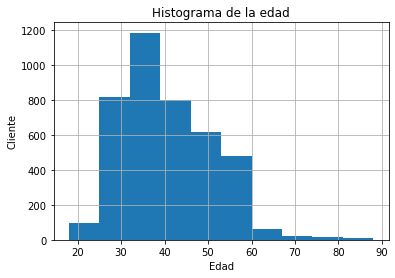

In [87]:
data.age.hist()
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')
plt.show()

### Selección de variables para el modelo logístico

#### Conversión de las variables categóricas a dummies

In [88]:
categories = ['job', 'marital', 'education', 'housing', 'loan', 'contact',
              'month', 'day_of_week', 'poutcome']
for category in categories:
    cat_list = 'cat' + '_' + category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data = data.join(cat_dummies)

In [89]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_Basic', 'cat_education_High School',
       'cat_education_Illiterate', 'cat_education_Profesional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellu

In [90]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [91]:
data_vars = data.columns.values.tolist()

In [92]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ['default']]

In [93]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Profesional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
       'cat_month_aug', 'cat_month_dec', 'cat_month_jul', 'cat_mont

In [94]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [95]:
n = 12

In [96]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [113]:
lr = LogisticRegression(solver='liblinear')

In [114]:
rfe = RFE(lr, n)
rfe.fit(bank_data[X], bank_data[Y].values.ravel())

/Users/nasa_penguin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=12)

In [115]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True])

In [117]:
rfe.ranking_

array([29, 37, 19, 42,  1, 14, 28, 24,  1, 30, 16,  3,  1, 31,  2, 38,  1,
       36, 21, 22, 12, 45, 20, 40, 27, 47, 39,  7, 46, 15, 34, 11, 23,  5,
        9, 13,  8, 35, 18,  4, 43, 33,  1,  1,  1,  1,  1, 17,  1, 44, 32,
       25, 41, 26, 10,  1,  6,  1])

In [118]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [119]:
list(z)

[('age', False, 29),
 ('duration', False, 37),
 ('campaign', False, 19),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 28),
 ('cons.conf.idx', False, 24),
 ('euribor3m', True, 1),
 ('nr.employed', False, 30),
 ('y', False, 16),
 ('cat_job_admin.', False, 3),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 31),
 ('cat_job_housemaid', False, 2),
 ('cat_job_management', False, 38),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 36),
 ('cat_job_services', False, 21),
 ('cat_job_student', False, 22),
 ('cat_job_technician', False, 12),
 ('cat_job_unemployed', False, 45),
 ('cat_job_unknown', False, 20),
 ('cat_marital_divorced', False, 40),
 ('cat_marital_married', False, 27),
 ('cat_marital_single', False, 47),
 ('cat_marital_unknown', False, 39),
 ('cat_education_Basic', False, 7),
 ('cat_education_High School', False, 46),
 ('cat_education_Illiterate', False, 15),
 ('cat_education_Profesional 

In [120]:
cols = ['previous', 'euribor3m', 'cat_job_blue-collar', 'cat_job_retired', 'cat_month_aug',
       'cat_month_dec', 'cat_month_jul', 'cat_month_jun', 'cat_month_mar', 'cat_month_nov',
       'cat_day_of_week_wed', 'cat_poutcome_nonexistent']

In [121]:
X = bank_data[cols]
Y = bank_data['y']

### Implementación del modelo de regresión logística